In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

<h2>1- Chargement de données </h2>

In [3]:
df = pd.read_csv("heart_clened.csv")
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0,thal_4.73421926910299,thal_6.0,thal_7.0
0,0.948726,1.0,0.757525,-0.264900,1.0,0.017197,0.0,1.087338,0,False,False,False,False,True,False,True,False,False,False,False,False,True,False
1,1.392002,1.0,1.611220,0.760415,0.0,-1.821905,1.0,0.397182,1,False,False,True,False,True,True,False,False,False,False,True,False,False,False
2,1.392002,1.0,-0.665300,-0.342283,0.0,-0.902354,1.0,1.346147,1,False,False,True,False,True,True,False,False,False,True,False,False,False,True
3,-1.932564,1.0,-0.096170,0.063974,0.0,1.637359,0.0,2.122573,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,-1.489288,0.0,-0.096170,-0.825922,0.0,0.980537,0.0,0.310912,0,True,False,False,False,True,False,False,False,False,False,False,False,False,False


<h2>2- Préparation de Données Pour Clustering </h2>

In [4]:
data = df.copy()
if "target" in data.columns:
  data_features = data.drop("target", axis=1)
else:
  data_features = data.copy()
data_features.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0,thal_4.73421926910299,thal_6.0,thal_7.0
0,0.948726,1.0,0.757525,-0.264900,1.0,0.017197,0.0,1.087338,False,False,False,False,True,False,True,False,False,False,False,False,True,False
1,1.392002,1.0,1.611220,0.760415,0.0,-1.821905,1.0,0.397182,False,False,True,False,True,True,False,False,False,False,True,False,False,False
2,1.392002,1.0,-0.665300,-0.342283,0.0,-0.902354,1.0,1.346147,False,False,True,False,True,True,False,False,False,True,False,False,False,True
3,-1.932564,1.0,-0.096170,0.063974,0.0,1.637359,0.0,2.122573,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,-1.489288,0.0,-0.096170,-0.825922,0.0,0.980537,0.0,0.310912,True,False,False,False,True,False,False,False,False,False,False,False,False,False


<h2> --> K-Means + Methode de Coude (Elbow method) </h2>

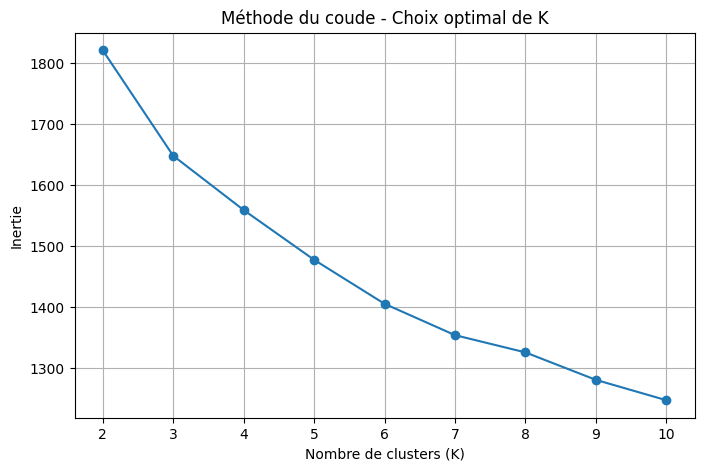

In [5]:
inertias = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_features)
    inertias.append(km.inertia_)

# Visualisation
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.title("Méthode du coude - Choix optimal de K")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

In [6]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_features)
df["cluster_kmeans"] = clusters_kmeans
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0,thal_4.73421926910299,thal_6.0,thal_7.0,cluster_kmeans
0,0.948726,1.0,0.757525,-0.264900,1.0,0.017197,0.0,1.087338,0,False,False,False,False,True,False,True,False,False,False,False,False,True,False,0
1,1.392002,1.0,1.611220,0.760415,0.0,-1.821905,1.0,0.397182,1,False,False,True,False,True,True,False,False,False,False,True,False,False,False,0
2,1.392002,1.0,-0.665300,-0.342283,0.0,-0.902354,1.0,1.346147,1,False,False,True,False,True,True,False,False,False,True,False,False,False,True,0
3,-1.932564,1.0,-0.096170,0.063974,0.0,1.637359,0.0,2.122573,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,2
4,-1.489288,0.0,-0.096170,-0.825922,0.0,0.980537,0.0,0.310912,0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,2


<h2> --> Visualisation 2D </h2>

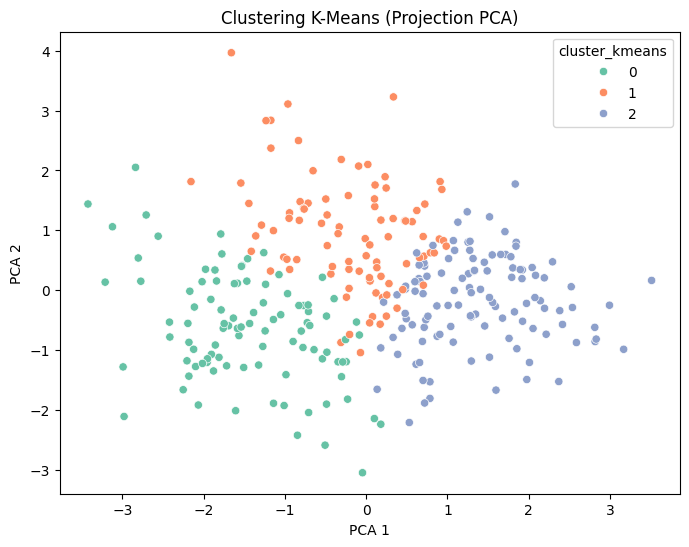

In [8]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_features)

# Add PCA components to the DataFrame
df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["pca1"],
    y=df["pca2"],
    hue=df["cluster_kmeans"],
    palette="Set2"
)
plt.title("Clustering K-Means (Projection PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

<h2> --> Score Sihouette </h2>

In [9]:
sil_kmeans = silhouette_score(data_features, clusters_kmeans)
sil_kmeans

np.float64(0.13335652094301534)

<h2> --> Regroupement Hierarchique </h2>

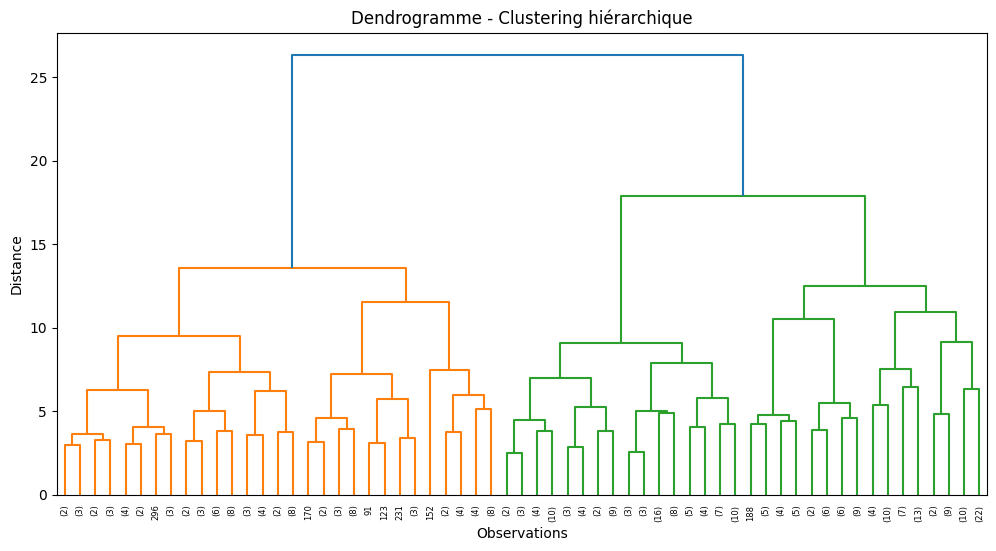

In [10]:
plt.figure(figsize=(12,6))
Z = linkage(data_features, method="ward")
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrogramme - Clustering hiérarchique")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

In [11]:
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters_hier = agg.fit_predict(data_features)
df["cluster_hier"] = clusters_hier
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0,thal_4.73421926910299,thal_6.0,thal_7.0,cluster_kmeans,pca1,pca2,cluster_hier
0,0.948726,1.0,0.757525,-0.264900,1.0,0.017197,0.0,1.087338,0,False,False,False,False,True,False,True,False,False,False,False,False,True,False,0,-1.072564,0.258379,0
1,1.392002,1.0,1.611220,0.760415,0.0,-1.821905,1.0,0.397182,1,False,False,True,False,True,True,False,False,False,False,True,False,False,False,0,-2.804606,0.536655,0
2,1.392002,1.0,-0.665300,-0.342283,0.0,-0.902354,1.0,1.346147,1,False,False,True,False,True,True,False,False,False,True,False,False,False,True,0,-1.957176,-1.208080,0
3,-1.932564,1.0,-0.096170,0.063974,0.0,1.637359,0.0,2.122573,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,2,1.135483,-0.250864,1
4,-1.489288,0.0,-0.096170,-0.825922,0.0,0.980537,0.0,0.310912,0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,2,1.591104,-0.273459,2


<h2>--> Visualisation </h2>

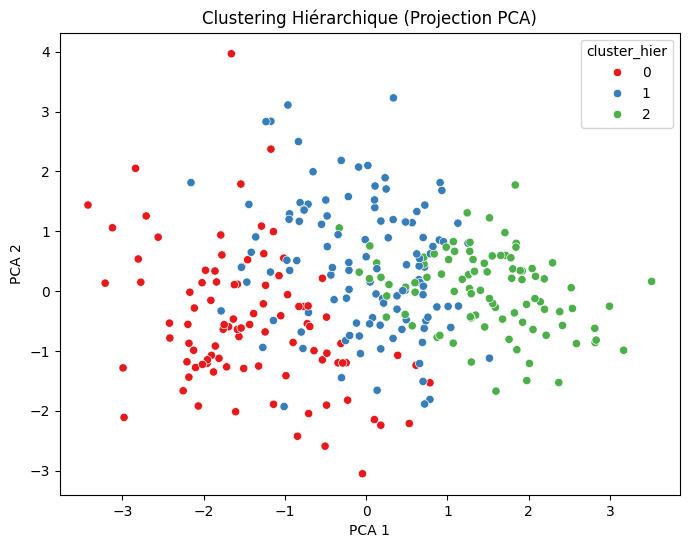

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["pca1"],
    y=df["pca2"],
    hue=df["cluster_hier"],
    palette="Set1"
)
plt.title("Clustering Hiérarchique (Projection PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

<h2>--> Comparaison avec les Vraies étiquettes

*/ Comparaison sous format de tableau croisé

In [13]:
if "target" in df.columns:
    print("Comparaison K-Means vs Vérité :")
    print(pd.crosstab(df["target"], df["cluster_kmeans"]))

    print("\nComparaison Hierarchical vs Vérité :")
    print(pd.crosstab(df["target"], df["cluster_hier"]))

Comparaison K-Means vs Vérité :
cluster_kmeans   0   1   2
target                    
0               18  54  92
1               80  36  23

Comparaison Hierarchical vs Vérité :
cluster_hier   0   1   2
target                  
0             16  72  76
1             79  43  17


*/ Scores silhouette

In [14]:
sil_hier = silhouette_score(data_features, clusters_hier)

print("Silhouette KMeans :", sil_kmeans)
print("Silhouette Hierarchical :", sil_hier)

Silhouette KMeans : 0.13335652094301534
Silhouette Hierarchical : 0.09602128380957992


<h2> Export Données </h2>

In [15]:
df.to_csv("heart_clustering_results.csv", index=False)
print("Fichier exporté : heart_clustering_results.csv")

Fichier exporté : heart_clustering_results.csv
